<a href="https://colab.research.google.com/github/AndreyDyachkov/python-dataviz-machine-learning/blob/main/split_scaling_cross_validation_regression_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Splitting data, Cross-validation, Scaling, Regression models

### Import libraries

In [ ]:
import pandas as pd
import numpy as np

### Import data

Cleaned data from the first part

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/AbsenteeismCleaned.csv')
df0.head()

,Reason_diseases,Reason_pregnancy,Reason_workRelated,Reason_consultations,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [ ]:
df = df0.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason_diseases            584 non-null    int64  
 1   Reason_pregnancy           584 non-null    int64  
 2   Reason_workRelated         584 non-null    int64  
 3   Reason_consultations       584 non-null    int64  
 4   Month Value                584 non-null    int64  
 5   Day of the Week            584 non-null    int64  
 6   Transportation Expense     584 non-null    int64  
 7   Distance to Work           584 non-null    int64  
 8   Age                        584 non-null    int64  
 9   Daily Work Load Average    584 non-null    float64
 10  Body Mass Index            584 non-null    int64  
 11  Education                  584 non-null    int64  
 12  Children                   584 non-null    int64  
 13  Pets                       584 non-null    int64  

## Splitting the dataset into train and test data

#### DataFrame or NumPy array?

ChatGPT:
1. **Pandas DataFrame:**
   - **Advantages:**
      - DataFrames are more high-level structures that allow you to work with labeled data easily.
      - Pandas provides convenient methods for handling missing values and other data preprocessing steps.
      - It retains column names and indices, which can be helpful for interpreting results.
   - **Considerations:**
      - Some machine learning libraries, like scikit-learn, accept both Pandas DataFrames and NumPy arrays as input, so you can choose based on your preference.
      - If you are working with a mix of numerical and categorical features, Pandas may be more convenient as it can handle both types of data.

2. **NumPy Array:**
   - **Advantages:**
      - NumPy arrays are lower-level and more efficient for numerical operations. If you are performing complex mathematical operations, working with NumPy arrays might be faster.
      - Some machine learning libraries may expect input in the form of NumPy arrays.
   - **Considerations:**
      - You may lose column names and other metadata when converting from a DataFrame to a NumPy array.
      - NumPy arrays are less convenient for handling mixed data types and missing values compared to Pandas DataFrames.

In practice, you can choose based on your specific needs and the requirements of the machine learning library you are using. If you are unsure, you can experiment with both and see which approach works better for your workflow. In many cases, it's common to start with a Pandas DataFrame for data exploration and preprocessing and then convert it to a NumPy array before feeding it into machine learning algorithms. The `values` attribute of a Pandas DataFrame can be used for this conversion:
```python
# Assuming df is your DataFrame
data_array = df.values
```

### Pandas DataFrame

In [ ]:
X1 = df.drop('Absenteeism Time in Hours', axis=1)
y1 = df['Absenteeism Time in Hours']

In [ ]:
print(X1.shape, y1.shape)

(584, 14) (584,)


### NumPy array

In [ ]:
X2 = df.iloc[:,:-1].values
y2 = df.iloc[:,-1].values

In [ ]:
print(X2.shape, y2.shape)

(584, 14) (584,)


Let's choose DataFrame

In [ ]:
X = X1
y = y1

### Split into X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(408, 14) (408,)
(176, 14) (176,)


In [ ]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


## Scaling

#### Scale, Standardize, or Normalize?


Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include: linear and logistic regression; nearest neighbors; neural networks; support vector machines with radial bias kernel functions; principal components analysis; linear discriminant analysis.

- **Scale** generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.
- **Standardize** generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. Scaling is often implied.
- **Normalize** can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

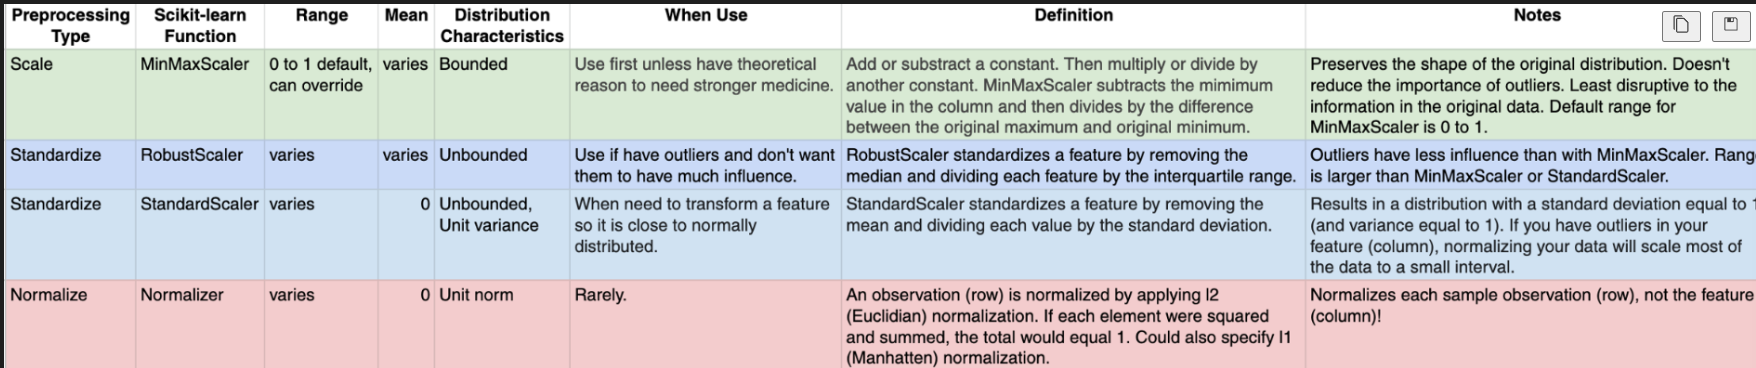

ChatGPT:

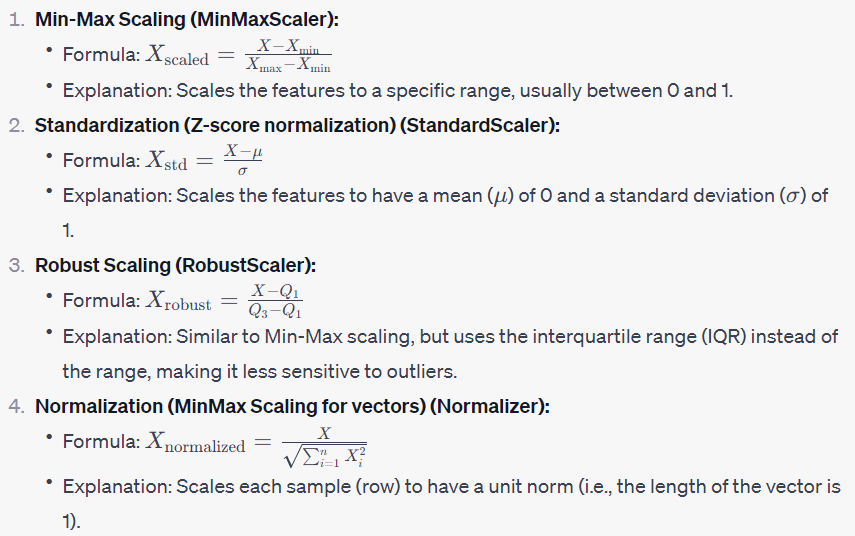

Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.
When normalizing the test set, one should apply the normalization parameters previously obtained from the training set as-is. Do not recalculate them on the test set, because they would be inconsistent with the model and this would produce wrong predictions.

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X1_train_scaled = scaler.fit_transform(X_train)
X1_test_scaled = scaler.transform(X_test)

In [ ]:
print('type(X1_train_scaled)',type(X1_train_scaled))

type(X1_train_scaled) <class 'numpy.ndarray'>


In [ ]:
pd.DataFrame(X1_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00
mean,0.21,0.01,0.08,0.65,0.47,0.36,0.39,0.52,0.41,0.44,0.42,0.18,0.26,0.25
std,0.41,0.10,0.27,0.48,0.32,0.25,0.23,0.31,0.26,0.24,0.23,0.38,0.28,0.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.18,0.17,0.24,0.26,0.17,0.26,0.26,0.00,0.00,0.00
50%,0.00,0.00,0.00,1.00,0.50,0.33,0.43,0.46,0.43,0.41,0.32,0.00,0.25,0.00
75%,0.00,0.00,0.00,1.00,0.73,0.50,0.52,0.80,0.57,0.57,0.63,0.00,0.50,0.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Standart scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X2_train_scaled = scaler.fit_transform(X_train)
X2_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X2_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.52,-0.10,-0.29,-1.36,-1.45,-1.44,-1.67,-1.69,-1.57,-1.82,-1.84,-0.46,-0.91,-0.69
25%,-0.52,-0.10,-0.29,-1.36,-0.89,-0.78,-0.62,-0.85,-0.90,-0.74,-0.69,-0.46,-0.91,-0.69
50%,-0.52,-0.10,-0.29,0.73,0.09,-0.11,0.16,-0.22,0.11,-0.13,-0.46,-0.46,-0.02,-0.69
75%,-0.52,-0.10,-0.29,0.73,0.80,0.56,0.55,0.90,0.61,0.55,0.92,-0.46,0.87,0.66
max,1.93,10.05,3.49,0.73,1.64,2.57,2.62,1.53,2.29,2.35,2.52,2.16,2.64,2.00


### Robust scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
X3_train_scaled = scaler.fit_transform(X_train)
X3_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X3_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00
mean,0.21,0.01,0.08,-0.35,-0.06,0.08,-0.14,0.13,-0.07,0.10,0.29,0.18,0.01,0.51
std,0.41,0.10,0.27,0.48,0.59,0.75,0.85,0.57,0.66,0.78,0.62,0.38,0.56,0.75
min,0.00,0.00,0.00,-1.00,-0.92,-1.00,-1.55,-0.84,-1.11,-1.31,-0.86,0.00,-0.50,0.00
25%,0.00,0.00,0.00,-1.00,-0.58,-0.50,-0.67,-0.36,-0.67,-0.48,-0.14,0.00,-0.50,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.42,0.50,0.33,0.64,0.33,0.52,0.86,0.00,0.50,1.00
max,1.00,1.00,1.00,0.00,0.92,2.00,2.09,1.00,1.44,1.92,1.86,1.00,1.50,2.00


Let's choose MinMax scaler

In [ ]:
X_train_scaled = X1_train_scaled
X_test_scaled = X1_test_scaled

## Regression

#### Which evaluation metric to choose?

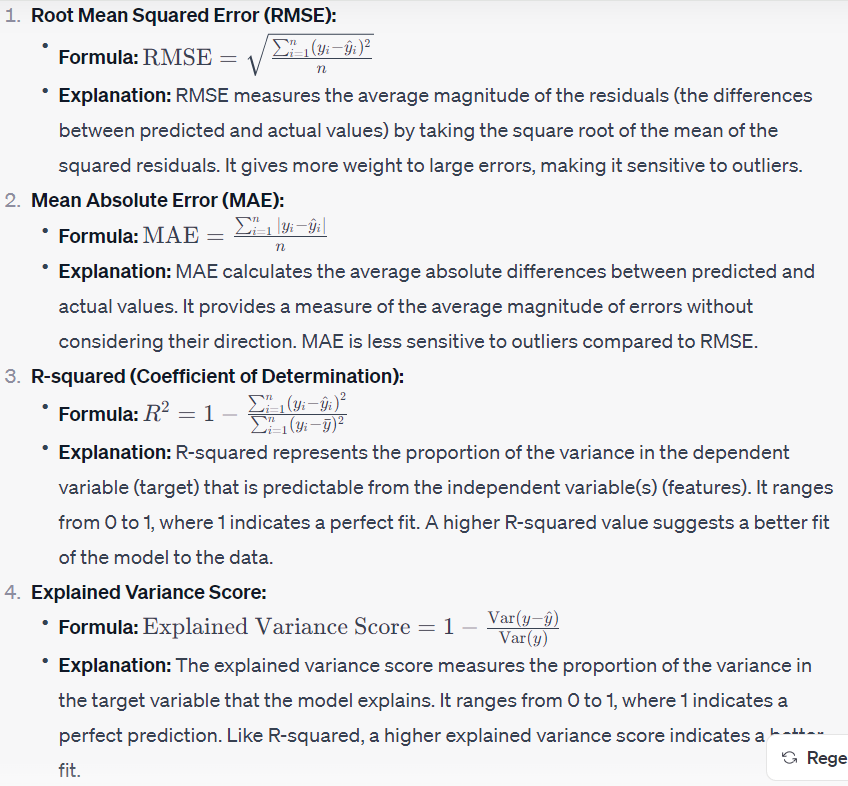

#### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
model = LinearRegression() # Create a linear regression model

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

LinearRegression()

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)
explained_var = explained_variance_score(y_test, y_pred_scaled)

In [ ]:
print("Linear Regression Coefficients:", model.coef_.round(2))
print("Intercept:", model.intercept_.round(2))
print("Root Mean Squared Error (RMSE):", rmse.round(2))
print("Mean Absolute Error (MAE):", mae.round(2))
print("R-squared:", r2.round(3))
print("Explained Variance Score:", explained_var.round(3))

Linear Regression Coefficients: [ 7.15  7.06  7.68  4.22  0.02 -0.66  2.53 -0.79 -2.76 -0.44  2.97  0.01
  1.89 -1.92]
Intercept: -0.93
Root Mean Squared Error (RMSE): 2.56
Mean Absolute Error (MAE): 1.88
R-squared: 0.351
Explained Variance Score: 0.352


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42) # Create a Random Forest Regressor

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)
explained_var = explained_variance_score(y_test, y_pred_scaled)

In [ ]:
print("Root Mean Squared Error (RMSE):", rmse.round(2))
print("Mean Absolute Error (MAE):", mae.round(2))
print("R-squared:", r2.round(3))
print("Explained Variance Score:", explained_var.round(3))

Root Mean Squared Error (RMSE): 2.62
Mean Absolute Error (MAE): 1.81
R-squared: 0.317
Explained Variance Score: 0.323


### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) # Create a Gradient Boosting Regressor

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)
explained_var = explained_variance_score(y_test, y_pred_scaled)

In [ ]:
print("Root Mean Squared Error (RMSE):", rmse.round(2))
print("Mean Absolute Error (MAE):", mae.round(2))
print("R-squared:", r2.round(3))
print("Explained Variance Score:", explained_var.round(3))

Root Mean Squared Error (RMSE): 2.79
Mean Absolute Error (MAE): 1.96
R-squared: 0.226
Explained Variance Score: 0.226


### Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear') # Create a Support Vector Regressor (SVR)

In [ ]:
model.fit(X_train_scaled, y_train) # Train the model on the training set

SVR(kernel='linear')

In [ ]:
y_pred_scaled = model.predict(X_test_scaled) # Make predictions on the scaled test set

Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)
explained_var = explained_variance_score(y_test, y_pred_scaled)

In [ ]:
print("Root Mean Squared Error (RMSE):", rmse.round(2))
print("Mean Absolute Error (MAE):", mae.round(2))
print("R-squared:", r2.round(3))
print("Explained Variance Score:", explained_var.round(3))

Root Mean Squared Error (RMSE): 2.61
Mean Absolute Error (MAE): 1.79
R-squared: 0.323
Explained Variance Score: 0.336


## Cross-validation

Normally you split the data into 3 sets.
- Training: used to train the model and optimize the model’s hyperparameters
- Testing: used to check that the optimized model works on unknown data to test that the model generalizes well
- Validation: during optimizing some information about test set leaks into the model by your choice of the parameters so you perform a final check on completely unknown data
In most common cross-validation approach you use part of the training set for testing. You do it several times so that each data point appears once in the test set.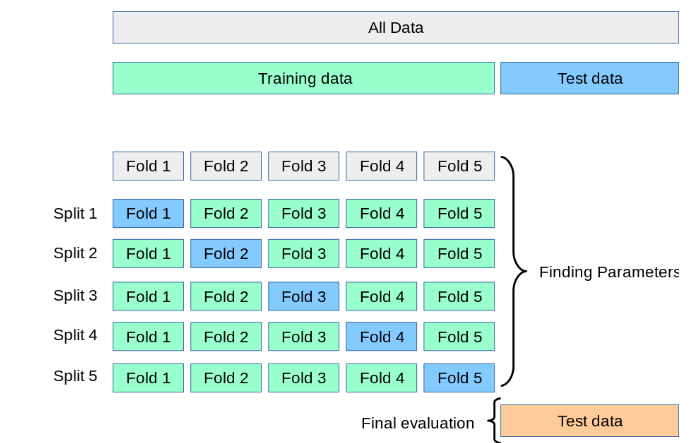

https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold

In [ ]:
model = LinearRegression()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Perform k-fold cross-validation

In [ ]:
y_cv_pred = cross_val_predict(model, X, y, cv=kf) # Make cross-validated predictions

Evaluate the model

In [ ]:
cv_mse = mean_squared_error(y, y_cv_pred)
cv_rmse = np.sqrt(cv_mse)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)
cv_explained_var = explained_variance_score(y, y_cv_pred)

In [ ]:
print("Cross-Validated Metrics:")
print("Cross-Validated RMSE:", cv_rmse.round(2))
print("Cross-Validated MAE:", cv_mae.round(2))
print("Cross-Validated R-squared:", cv_r2.round(2))
print("Cross-Validated Explained Variance Score:", cv_explained_var.round(2))


Cross-Validated Metrics:
Cross-Validated RMSE: 2.84
Cross-Validated MAE: 2.03
Cross-Validated R-squared: 0.31
Cross-Validated Explained Variance Score: 0.31
